# Linear Regression with Python Scikit Learn

* The task is to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
* This is a simple linear regression as it involves just two variables.

# Table of Contents

* [Importing the required libraries](#im)
* [Importing dataset](#imd)
* [Data Visualization](#dv)
* [Data Preprocessing](#dp)
* [Training](#t)
* [Inference](#i)
* [Evaluating the model](#em)

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/student-scores/student_scores - student_scores.csv


# <a id="im"> Importing the required libraries <a>

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# <a id="imd"> Importing dataset </a>

In [3]:
data = pd.read_csv('/kaggle/input/student-scores/student_scores - student_scores.csv')

# <a id="dv"> Data Visualization </a>

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
print("Shape of the DataFrame:")
print(data.shape)

Shape of the DataFrame:
(25, 2)


In [8]:
print("Number of elements in the DataFrame:")
print(data.size)

Number of elements in the DataFrame:
50


In [9]:
print("Number of Dimensions present in the DataFrame:")
print(data.ndim)

Number of Dimensions present in the DataFrame:
2


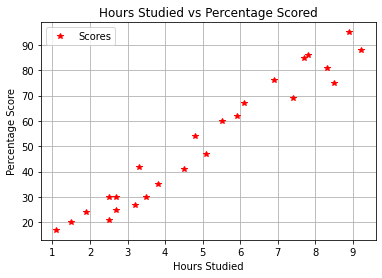

In [10]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores',color = 'Red', style='*')  
plt.title('Hours Studied vs Percentage Scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.show()

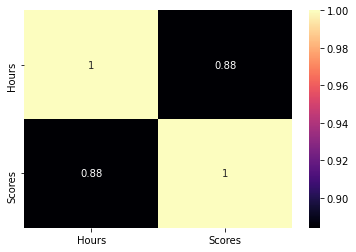

In [11]:
relation = data.corr(method ='kendall')
sns.heatmap(relation, annot=True, cmap='magma')
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

# <a id="dp"> Data Preprocessing </a>

We are preparing the data by dividing the data into "attributes" (inputs) and "labels" (outputs).

In [12]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [13]:
# import library
from sklearn.model_selection import train_test_split 

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# <a id="t"> Training </a>

We have already split our data into training and testing sets, now we need to train our algorithm.

In [15]:
# import library
from sklearn.linear_model import LinearRegression  

In [16]:
regressor = LinearRegression() 

In [17]:
 regressor.fit(X_train, y_train) 

LinearRegression()

In [18]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

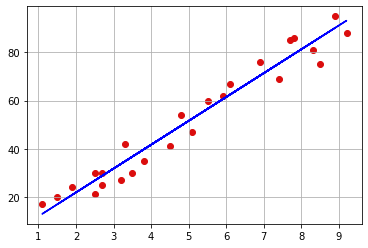

(array([9.91065648]), 2.018160041434683)

In [19]:
# Plotting for the test data
plt.scatter(X, y, color = '#db0d0d')
plt.plot(X, line, color = 'blue')
plt.rcParams['axes.facecolor'] = 'white'
plt.grid()
plt.show()
regressor.coef_, regressor.intercept_

# <a id="i"> Inference </a>

Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
# Testing data - In Hours
print(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Predicting the scores
y_pred = regressor.predict(X_test) 
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df) 

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


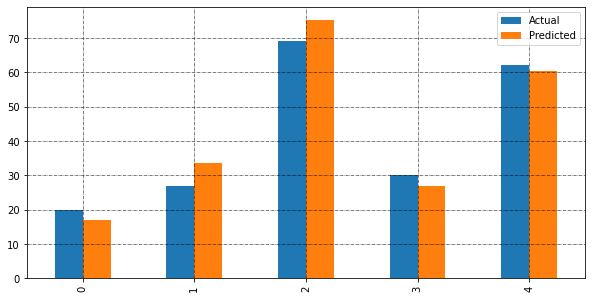

In [23]:
graph = df
graph.plot(kind='bar',figsize=(10,5))
plt.grid(which = 'both', color='black', linestyle='-.', linewidth=0.5)
plt.show()

In [24]:
print("The train score: {}".format(regressor.score(X_train,y_train)))
print("The test score: {}".format(regressor.score(X_test,y_test)))

The train score: 0.9515510725211552
The test score: 0.9454906892105356


In [25]:
# You can also test with your own data
hours = [[9.25]]
own_pred = regressor.predict(hours)
#print(type(own_pred))
#own_pred.reshape(-1,1)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


# <a id="em"> Evaluating the model </a>

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the MAE and MSE. There are many such metrics.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test,y_pred)))
print("Mean Squared Error: {}".format(mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
